In [21]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

le = LabelEncoder()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
df = pd.read_csv('df_with_emotions.csv')

In [23]:
df.head()

,Age,Gender,GPA,Stress_Level,Anxiety_Score,Depression_Score,Daily_Reflections,Sleep_Hours,Steps_Per_Day,Mental_Health_Status,fear,anger,anticipation,trust,surprise,sadness,joy,disgust,negative,positive
0,1.159999,2,-0.566791,5,20,6,Onto foreign do environmental anyone every nea...,0.483148,-0.963883,2,-0.589006,-0.403906,-0.754115,-0.959785,-0.409189,-0.401565,-0.739343,0.000000,1.000000,0.000000
1,-0.601579,1,-0.138201,5,3,7,Party but others visit admit industry country ...,-0.633426,-0.566872,2,-0.589006,-0.403906,-0.754115,-0.959785,-0.409189,-0.401565,-0.739343,0.000000,0.000000,1.000000
2,0.279210,0,1.400826,5,11,24,Religious sure wait do chance decade according...,1.468360,0.793510,2,-0.589006,-0.403906,0.977859,-0.959785,2.005550,-0.401565,-0.739343,0.000000,0.250000,0.250000
3,-1.041973,1,-1.501896,4,15,14,A task effect entire coach join series.,1.402679,-0.263157,2,-0.589006,-0.403906,-0.754115,1.588991,-0.409189,-0.401565,-0.739343,0.000000,0.000000,0.500000
4,-0.601579,2,0.115057,1,2,4,Knowledge several camera wait week write quali...,-0.107979,-1.201176,0,-0.589006,0.271686,0.311715,-0.175546,0.333807,-0.401565,0.895866,0.076923,0.153846,0.153846


In [24]:
X = df.drop(columns=['Mental_Health_Status', 'Daily_Reflections', 'Stress_Level', 'Depression_Score', 'Anxiety_Score'])
Y = df['Mental_Health_Status']
X.head()

,Age,Gender,GPA,Sleep_Hours,Steps_Per_Day,fear,anger,anticipation,trust,surprise,sadness,joy,disgust,negative,positive
0,1.159999,2,-0.566791,0.483148,-0.963883,-0.589006,-0.403906,-0.754115,-0.959785,-0.409189,-0.401565,-0.739343,0.000000,1.000000,0.000000
1,-0.601579,1,-0.138201,-0.633426,-0.566872,-0.589006,-0.403906,-0.754115,-0.959785,-0.409189,-0.401565,-0.739343,0.000000,0.000000,1.000000
2,0.279210,0,1.400826,1.468360,0.793510,-0.589006,-0.403906,0.977859,-0.959785,2.005550,-0.401565,-0.739343,0.000000,0.250000,0.250000
3,-1.041973,1,-1.501896,1.402679,-0.263157,-0.589006,-0.403906,-0.754115,1.588991,-0.409189,-0.401565,-0.739343,0.000000,0.000000,0.500000
4,-0.601579,2,0.115057,-0.107979,-1.201176,-0.589006,0.271686,0.311715,-0.175546,0.333807,-0.401565,0.895866,0.076923,0.153846,0.153846


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
model = XGBClassifier(objective="multi:softmax", num_class=3, random_state=42) #plot the parameters to find the best fit
param_grid = {
    'n_estimators': [1, 3, 5, 10],
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [3, 5],
}

In [27]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

,estimator,"XGBClassifier..._class=3, ...)"
,param_grid,"{'learning_rate': [0.1, 0.5, ...], 'max_depth': [3, 5], 'n_estimators': [1, 3, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,objective,'multi:softmax'


In [28]:
results = pd.DataFrame(grid_search.cv_results_)

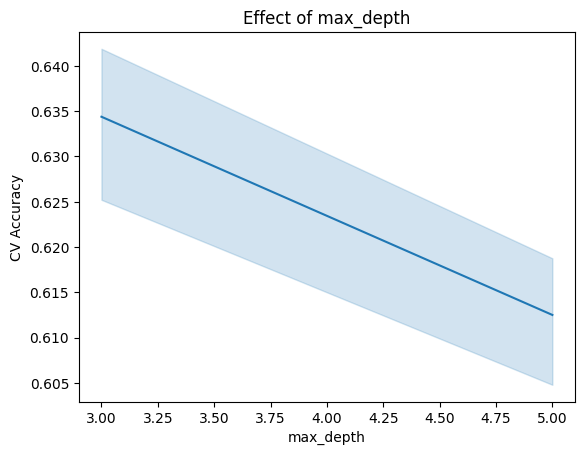

In [29]:
sns.lineplot(x='param_max_depth', y='mean_test_score', data=results)
plt.title("Effect of max_depth")
plt.ylabel("CV Accuracy")
plt.xlabel("max_depth")
plt.show()

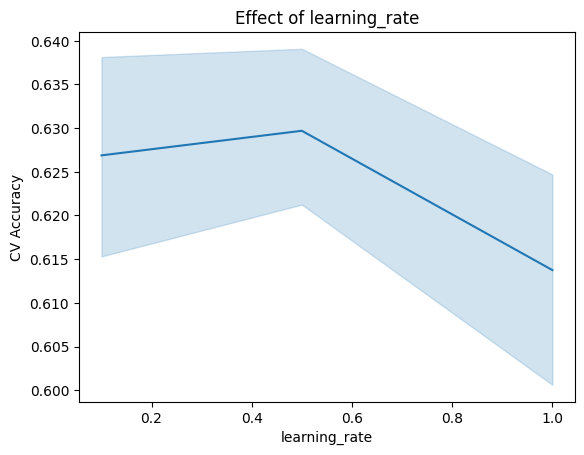

In [30]:
sns.lineplot(x='param_learning_rate', y='mean_test_score', data=results)
plt.title("Effect of learning_rate")
plt.ylabel("CV Accuracy")
plt.xlabel("learning_rate")
plt.show()

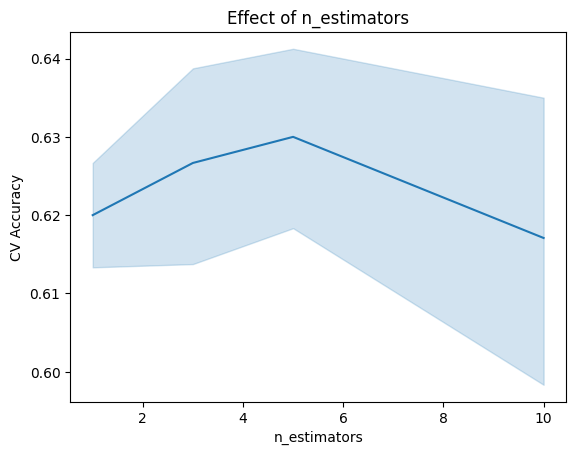

In [31]:
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=results)
plt.title("Effect of n_estimators")
plt.ylabel("CV Accuracy")
plt.xlabel("n_estimators")
plt.show()

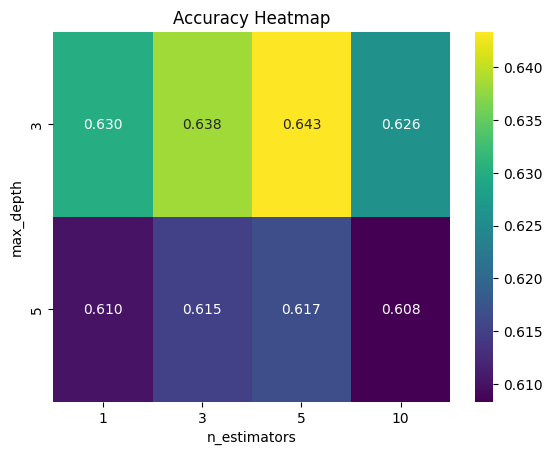

In [32]:
pivot = results.pivot_table(index='param_max_depth',
                             columns='param_n_estimators',
                             values='mean_test_score')

sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis")
plt.title("Accuracy Heatmap")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

In [33]:
model = XGBClassifier(objective="multi:softmax", num_class=3, random_state=42)

In [34]:
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
print("Accuracy scores for each fold:", scores)
print("Average accuracy:", scores.mean())

Accuracy scores for each fold: [0.575 0.55  0.6   0.525 0.625 0.6   0.6   0.675 0.55  0.6  ]
Average accuracy: 0.59


In [35]:
model.fit(X_train, y_train)

,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [36]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.61


In [37]:
import joblib
joblib.dump(model, 'XGBoost_model.pkl')

['XGBoost_model.pkl']

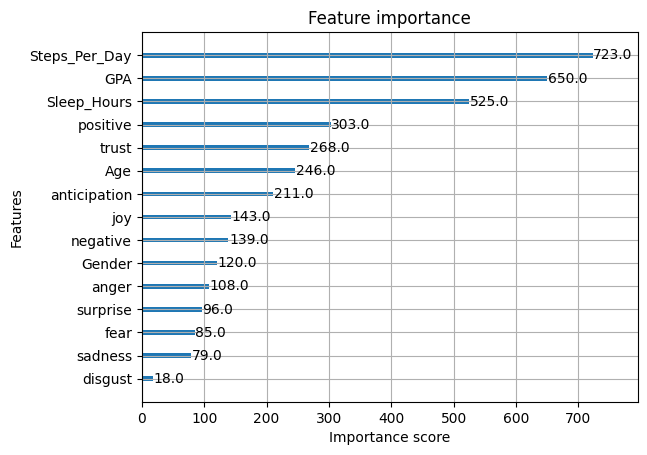

In [38]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()

In [40]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

# F1 Score (macro average for balanced view across all classes)
f1 = f1_score(y_test, y_pred, average='macro')
print("Macro-Averaged F1 Score:", f1)

# Per-Class Precision and Recall
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

class_labels = sorted(y_test.unique())  # e.g., [0, 1, 2]

print("\nPrecision and Recall by Class:")
for i, label in enumerate(class_labels):
    print(f"Class {label}: Precision = {precision[i]:.3f}, Recall = {recall[i]:.3f}")

# Optional: Full classification report with F1, Precision, Recall
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Healthy', 'At risk', 'Struggling']))


Macro-Averaged F1 Score: 0.3310810810810811

Precision and Recall by Class:
Class 0: Precision = 0.000, Recall = 0.000
Class 1: Precision = 0.333, Recall = 0.200
Class 2: Precision = 0.679, Recall = 0.821

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.00      0.00      0.00         3
     At risk       0.33      0.20      0.25        30
  Struggling       0.68      0.82      0.74        67

    accuracy                           0.61       100
   macro avg       0.34      0.34      0.33       100
weighted avg       0.55      0.61      0.57       100



Confusion Matrix: XGBoost


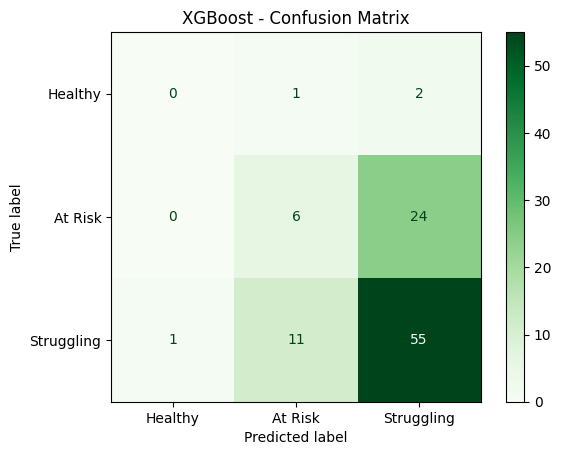

In [43]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,
                                  display_labels=['Healthy', 'At Risk', 'Struggling'])
print("Confusion Matrix: XGBoost")
disp_xgb.plot(cmap='Greens')
plt.title("XGBoost - Confusion Matrix")
plt.show()
